In [18]:
import  matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pyod.models.hbos import HBOS
from pyod.models.pca import PCA
from time import time


df_time = pd.read_csv("TimeData.csv")
df_precision = pd.read_csv("PrecisionData.csv")
df_recall = pd.read_csv("RecallData.csv")

In [19]:
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
# pipelines
 
# data preparation
from sklearn.preprocessing import *
# from sklearn.decomposition import PCA
from pyod.models.pca import PCA
# from imblearn.datasets import make_imbalance
# from imblearn.over_sampling import SMOTE
# # machine learning
# from sklearn.linear_model import *
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier, XGBRegressor
#------------------
from __future__ import division
from __future__ import print_function
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF

from pyod.models.feature_bagging import FeatureBagging
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.metrics import roc_curve, roc_auc_score
from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
from time import time
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_precision_recall_curve

In [20]:
 
import pandas as pd
dataset = pd.read_csv(r"C:\Users\NaumanRafique\Downloads\nourasaeed721-attachments\wustl.csv",usecols=['SIntPkt','Pulse_Rate',
 'dMaxPktSz','DstLoad', 'Trans','SrcLoad','sMinPktSz','DIntPktAct','DIntPkt','DstBytes','SpO2','DstGap','Loss','Label','DIA',
 'TotPkts','sMaxPktSz','Load','Rate','pSrcLoss','SrcBytes','DstJitter','Temp','SYS','pDstLoss','Heart_rate','dMinPktSz', 'SrcJitter','SIntPktAct','Resp_Rate','TotBytes','ST','pLoss','Dur','SrcGap'])

print(dataset.shape)
 

(16318, 35)


In [21]:
df_time.drop("Unnamed: 0",axis=1,inplace=True)
df_recall.drop("Unnamed: 0",axis=1,inplace=True)
df_precision.drop("Unnamed: 0",axis=1,inplace=True)

In [22]:
df_time.columns

Index(['Data Sample', 'Testing Size', 'ABOD', 'CBLOF', 'FB', 'HBOS', 'IForest',
       'KNN', 'LOF', 'MCD', 'OCSVM', 'PCA'],
      dtype='object')

In [23]:
df_final = df_time.merge(df_precision,on=['Data Sample',"Testing Size"],suffixes=['_time',"_preicision"]).merge(df_precision,on=['Data Sample',"Testing Size"],suffixes=['recall'])

In [24]:
pd.reset_option("max_columns")

In [25]:
final_list = []
from statistics import mode
store_list = []
l = []
for row in range(15):
    d1 = dict(df_time.loc[row][2:])
    d2= dict(df_precision.loc[row][2:])
    d3 = dict(df_recall.loc[row][2:])
    
#     calculating the lowest time execution
    
    time_key  = min(d1, key=d1.get)
#     print("time",time_key)
    precision = max(d2, key=d2.get)
#     print("precision",precision)
    recall = max(d3, key=d3.get)
#     print("recall",recall)
    l.extend([time_key,precision,recall])
#     print("list--->",l)
    try : 
        m = mode(l)
#         print("mode--->",m)
        store_list.extend([m,d2[m],d3[m]])
#         print("store list-->",store_list)
        
    except:
#         print("except")
        store_list.extend([time_key,d2[time_key],d3[time_key]])
#         print("store list-->",store_list)
        
    finally :
        final_list.append(store_list)
#         print("final--->",final_list)
        l=[]
        store_list = []
        
        
    

In [26]:
l=['IFOREST',"OCSVM","IFOREST"]
from statistics import mode
mode(l)

'IFOREST'

In [27]:
final_list[0][2]

0.6485

In [28]:
dataset_sample = [1000,5000,10000,15000,16318]
testing_size= [0.2,0.3,0.4]
index= 0
for sample in dataset_sample:
    for size in testing_size:
        final_list[index].append(sample)
        final_list[index].append(size)
#         print(index)
        index+=1
        
        

In [29]:
# classifier = {

# # 'Angle-based Outlier Detector (ABOD)': ABOD(
# #         contamination=outliers_fraction),
# #         'Cluster-based Local Outlier Factor': CBLOF(
# #             contamination=outliers_fraction, check_estimator=False,
# #             random_state=random_state),
# #         'Feature Bagging': FeatureBagging(contamination=outliers_fraction,
# #                                           random_state=random_state),
#         'HBOS': HBOS(
#             contamination=outliers_fraction),
#         'IForest': IForest(contamination=outliers_fraction,
#                                     random_state=random_state),
# #         'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
# #         'Local Outlier Factor (LOF)': LOF(
# #             contamination=outliers_fraction),
# #         'Minimum Covariance Determinant (MCD)': MCD(
# #             contamination=outliers_fraction, random_state=random_state),
#         'OCSVM': OCSVM(contamination=outliers_fraction)
# }

In [30]:
final_list

[['PCA', 0.4231, 0.6485, 1000, 0.2],
 ['PCA', 0.4359, 0.6518, 1000, 0.3],
 ['PCA', 0.3774, 0.6124, 1000, 0.4],
 ['PCA', 0.4758, 0.6472, 5000, 0.2],
 ['PCA', 0.4773, 0.6554, 5000, 0.3],
 ['IForest', 0.5193, 0.6941, 5000, 0.4],
 ['PCA', 0.4882, 0.6617, 10000, 0.2],
 ['IForest', 0.4853, 0.7166, 10000, 0.3],
 ['HBOS', 0.3649, 0.7171, 10000, 0.4],
 ['IForest', 0.4872, 0.7182, 15000, 0.2],
 ['IForest', 0.4791, 0.7082, 15000, 0.3],
 ['PCA', 0.424, 0.6771, 15000, 0.4],
 ['HBOS', 0.1979, 0.5756, 16318, 0.2],
 ['PCA', 0.4626, 0.6738, 16318, 0.3],
 ['PCA', 0.4715, 0.6816, 16318, 0.4]]

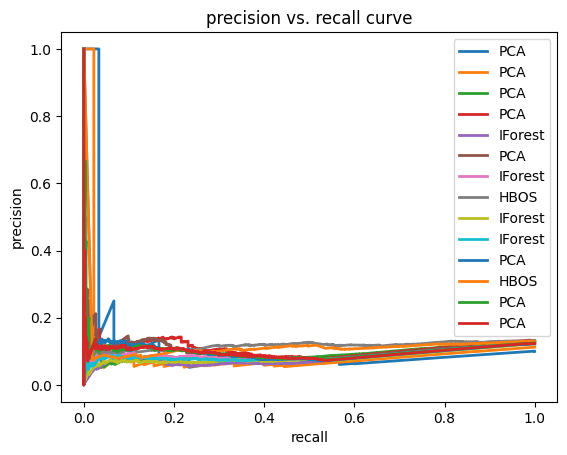

In [31]:
 
random_state = 42


import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
sc = StandardScaler()

import pandas as pd
 

for sample in final_list[1:]:
#         ['OCSVM', 0.3125, 0.591, 1000, 0.2],
    dataset_sample = dataset.sample(sample[3])
    
    x = dataset_sample.iloc[:,:-1].values
    y = dataset_sample.iloc[:,-1].values
    y = y.astype(np.uint8)
    n_classes = len(set(y))

    y = label_binarize( y, classes=[*range(n_classes)])
        
#         ['OCSVM', 0.5143, 0.6906, 16318, 0.4]
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)
        
    classifierlist = {
        'ABOD': ABOD(
        contamination=outliers_fraction),
        'CBLOF': CBLOF(
            contamination=outliers_fraction, check_estimator=False,
            random_state=random_state),
        'FB': FeatureBagging(contamination=outliers_fraction,
                                          random_state=random_state),
        'HBOS': HBOS(
            contamination=outliers_fraction),
        'IForest': IForest(contamination=outliers_fraction,
                                    random_state=random_state),
        'KNN': KNN(contamination=outliers_fraction),
        'LOF': LOF(
            contamination=outliers_fraction),
        'MCD': MCD(
            contamination=outliers_fraction, random_state=random_state),
        'OCSVM': OCSVM(contamination=outliers_fraction),
        'PCA': PCA(
            contamination=outliers_fraction, random_state=random_state)
    }
    
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = sample[4], random_state =random_state)
    
    clf = classifierlist[sample[0]]
    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    clf.fit(x_train, y_train)
    y_score = clf.predict_proba(x_test)
    precision = dict()
    recall = dict()
    
    for i in range(n_classes-1):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label=sample[0])
    
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
#     plt.show()

    
    
    
        
        
            

 

        




